# Naive Bayes 
- supervised ML model.
- Bayes' theorem gives a mathematical rule for inverting conditional probabilities,allowing one to find the probability of a cause given its effect.
- "naive" assumption of conditional independence between features. 

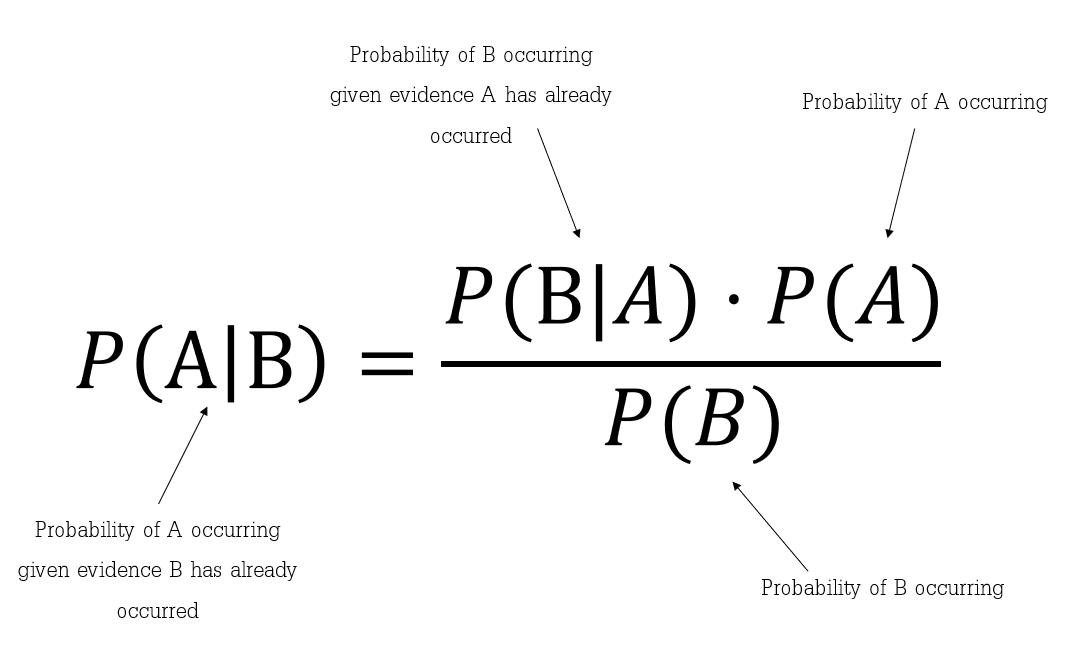

# some uses cases:
- spam email detection
- digit recognition
- weather prediction
- face detection
- new article categorization

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.naive_bayes import GaussianNB

In [56]:
df = pd.read_csv('titanic.csv')
df.drop(['Name', 'Ticket','PassengerId','SibSp', 'Parch', 'Cabin', 'Embarked'],axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [57]:
features = df.drop(["Survived"], axis=1)
target = df["Survived"]

print(features.head(), '\n')

print(target.head())

   Pclass     Sex   Age     Fare
0       3    male  22.0   7.2500
1       1  female  38.0  71.2833
2       3  female  26.0   7.9250
3       1  female  35.0  53.1000
4       3    male  35.0   8.0500 

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [58]:
# The sex column must be encoded as it has text ---> use OneHotEncoding as nominal data present
# instead of onehotencoding we will use get_dummies ---> much lighter

dummy_vars = pd.get_dummies(features['Sex'])
features = pd.concat((features,dummy_vars), axis=1)
features.drop(['Sex'], axis=1, inplace=True)
features.head()

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,False,True
1,1,38.0,71.2833,True,False
2,3,26.0,7.9250,True,False
3,1,35.0,53.1000,True,False
4,3,35.0,8.0500,False,True


In [60]:
# finding if any NaN values present in the dataset

features.columns[features.isna().any()]

Index(['Age'], dtype='object')

In [61]:
# age has a couple of NaN

features['Age'][:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [63]:
features['Age'] = features['Age'].fillna(features['Age'].mean())

features['Age'][:10]

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: Age, dtype: float64

In [193]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [194]:
# using Gaussian Naive Bayes ---> since data is normally distributed

gnb = GaussianNB()
gnb.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


In [195]:
gnb.score(X_test, y_test)

0.7597765363128491

In [209]:
# routine to keep executing the training on different train sets till 90% accuracy achieved
score = 0
session = 0 # maximum 200 epochs
while session < 200:
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    session += 1
    score = gnb.score(X_test, y_test)
    print('Training round: {}'.format(session))
    print('Score of Session {} = {}'.format(session, score))
    print()
    if score > 0.85:
        break

# achieved a max accuracy of 86%

Training round: 1
Score of Session 1 = 0.7150837988826816

Training round: 2
Score of Session 2 = 0.7877094972067039

Training round: 3
Score of Session 3 = 0.8100558659217877

Training round: 4
Score of Session 4 = 0.8044692737430168

Training round: 5
Score of Session 5 = 0.7430167597765364

Training round: 6
Score of Session 6 = 0.7597765363128491

Training round: 7
Score of Session 7 = 0.7877094972067039

Training round: 8
Score of Session 8 = 0.7877094972067039

Training round: 9
Score of Session 9 = 0.7486033519553073

Training round: 10
Score of Session 10 = 0.7653631284916201

Training round: 11
Score of Session 11 = 0.7877094972067039

Training round: 12
Score of Session 12 = 0.776536312849162

Training round: 13
Score of Session 13 = 0.7877094972067039

Training round: 14
Score of Session 14 = 0.7262569832402235

Training round: 15
Score of Session 15 = 0.776536312849162

Training round: 16
Score of Session 16 = 0.8156424581005587

Training round: 17
Score of Session 17 = 0.7

In [210]:
gnb.score(X_test, y_test) # after the last iteration of the train loop

0.8603351955307262

In [219]:
print(y_test[:10])
predictions = gnb.predict(X_test[:10])

print(predictions) # misclassified 1 --> 744

744    1
789    0
462    0
231    0
422    0
737    1
855    1
256    1
392    0
324    0
Name: Survived, dtype: int64
[0 0 0 0 0 1 1 1 0 0]


In [220]:
# we can also print survival probabilities

gnb.predict_proba(X_test[:10])
# [not survival, survival] --> format of the probabilities

array([[9.84136080e-01, 1.58639198e-02],
       [6.81131395e-01, 3.18868605e-01],
       [8.72959582e-01, 1.27040418e-01],
       [9.83850471e-01, 1.61495293e-02],
       [9.83855179e-01, 1.61448207e-02],
       [1.03681393e-33, 1.00000000e+00],
       [8.38982742e-02, 9.16101726e-01],
       [3.83047083e-03, 9.96169529e-01],
       [9.83688550e-01, 1.63114503e-02],
       [9.57202196e-01, 4.27978044e-02]])